# PandaRoot Digitalization Plots

Plots of the **MC Hits** in the tracking systems of the PANDA detector, created with PandaRoot.

## Python Imports

Import the required python packages

In [2]:
# python IO for ROOT files
import uproot

# numpy
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
# %matplotlib widget

import seaborn as sns

import pandas as pd

# to get access to the pdg database 2024 version
import pdg
PdgApi = pdg.connect('sqlite:///../pdgall-2024-v0.1.0.sqlite')

snsColors = sns.color_palette("deep").as_hex()
snsColorNames = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
snsPal = {name: snsColors[i] for i, name in enumerate(snsColorNames)}

## Global Parameters

Get/set the paths to the input and output files.

Path to the root files with the data that should be plotted:

In [3]:
rootFilePath = "/home/nikin105/mlProject/simFiles/XiAntiXi/root"

Path where the images should be saved

In [4]:
imagePath = "/home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/digi"

Name of the simulations (prefix) that should be plotted:

In [5]:
projectName = "XiAntiXi"

In [6]:
particleNameDict = {
	"p"         : r"p",
	"pbar"      : r"\bar{p}",
	"pi+"       : r"\pi^+",
	"pi-"       : r"\pi^-",
	"e+"        : r"e^+",
	"e-"        : r"e^-",
	"Xibar+"    : r"\bar{\Xi}^+",
	"Xi-"       : r"\Xi^-",
	"Lambda0"   : r"\Lambda^0",
	"Lambdabar0": r"\bar{\Lambda}^0",
	"mu+"       : r"\mu^+",
	"mu-"       : r"\mu^-",
}

### Import Parameters

Import the parameters corresponding to the detector responses, from the corresponding root file.

Digitalization root file:

In [7]:
digiFile = rootFilePath + "/" + projectName + "_digi.root"
simFile  = rootFilePath + "/" + projectName + "_sim.root"
print("Input digitalization file: ",digiFile)
print("Input simulation file: ",simFile)
hit_params = uproot.open(digiFile+":pndsim")
mcPoint_params = uproot.open(simFile+":pndsim")

Input digitalization file:  /home/nikin105/mlProject/simFiles/XiAntiXi/root/XiAntiXi_digi.root
Input simulation file:  /home/nikin105/mlProject/simFiles/XiAntiXi/root/XiAntiXi_sim.root


#### Straw Tube Detector (STT) : `STTHit`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| TubeID			| Unique tube ID										| -		| Int_t			| PndSttHit							|
| Pulse				| Time pulse											| ns	| Double_t		| PndSttHit							|
| Isochrone			| The radial measurement								| cm	| Double_t		| PndSttHit							|
| IsochroneError	| The error on on the radial measurement				| cm	| Double_t		| PndSttHit							|
| DepCharge			| Deposited charge										| -		| Double_t		| PndSttHit							|

#### Micro Vertex Detector (MVD) : `MVDHitsPixel` & `MVDHitsStrip`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| SensorID			| Sensor ID												| -		| Int_t			| PndSdsHit (?)
| Charge			| Charge measured in hit								| e		| Double_t		| PndSdsHit (?)
| NDigiHits			| Number of pixels fired for this event					| -		| Int_t			| PndSdsHit (?)
| ClusterIndex		| Cluster number										| -		| Int_t			| PndSdsHit (?)
| BotIndex			| Bottom Cluster ID (?)									| -		| Int_t			| PndSdsHit (?)
| Cov				| Covariance matrix of the hit position (?)				| cm	| TMatrixD		| PndSdsHit (?)

## Helper Functions

In [8]:
def makeTrackDict(trackIDs, trackParameter, trackDict):
	""" This function creates a dictionary with the trackID as the key and arrays with track parameters (coordinates, momenta, etc.)
	    corresponding to the trackID as the values

	Args:
		trackIDs (array): List of track IDs
		trackParameter (array): List of track parameters
		trackDict (dictionary): Dictionary with trackID as the key and arrays with track parameters as the values

	Returns:
		dictionary: Dictionary with trackID as the key and arrays with track parameters as the values
	"""
	point = 0
 	# Iterate over all track IDs
	for trackID in trackIDs:
		if trackID not in trackDict:
			trackDict[trackID]  = np.zeros(0)
		trackDict[trackID]  = np.append(trackDict[trackID], trackParameter[point])
		point += 1
	return trackDict

In [9]:
def getParticleTexName(pdgID):
	"""Get the latex formatted name of a particle from its PDG ID

	Args:
		pdgID (int, string): PDG ID

	Returns:
		string: Latex formatted name of the particle
	"""
	return particleNameDict[PdgApi.get_particle_by_mcid(str(pdgID)).name]

In [10]:
def getProcess(trackID, pdgID, motherID, secondMotherID, maxReactionDepth = np.inf):
	"""Get the the reaction chain leading to the particle with the given trackID with a given maximum reaction depth

	Args:
		trackID (int): ID of the particle track
		pdgID (array): List with the PDG IDs of the particles
		motherID (array): List with the mother particle IDs (mother particles of the secondary particles)
		secondMotherID (array): List with the second mother particle IDs (mother particles of the primary particles)
		maxReactionDepth (int, optional): maximal number of contributing particles. Defaults to np.inf.

	Returns:
		string: Latex formatted string of the reaction chain
	"""
	currMID      = trackID
	curr2ndMID   = trackID
	reactionStep = 0
	
	# Name of the final particle
	reactionName = fr"$ {getParticleTexName(pdgID[trackID])}_{{{trackID}}} $ "
	
	# Iterate over the mother particles of the secondary particles until a primary particle or the maximum reaction depth is reached 
	while currMID != -1 and reactionStep < maxReactionDepth:
		# Ensure that the first particle is not included twice
		if reactionStep != 0:
			reactionName = fr"$ {getParticleTexName(pdgID[currMID])}_{{{currMID}}} \to $ " + reactionName
  		# When the last secondary particle is reached set the primary particle ID
		if motherID[currMID] == -1:
			curr2ndMID = currMID
		currMID = motherID[currMID]
		reactionStep += 1
	
	# Iterate over the mother particles of the primary particles until the first primary particle or the maximum reaction depth is reached
	while curr2ndMID != -1 and reactionStep < maxReactionDepth:
		curr2ndMID = secondMotherID[curr2ndMID]
		# Check if the current particle is ppbar (88888) and set the reaction name accordingly as it is not in the pdg database
		if pdgID[curr2ndMID] == 88888 and reactionStep != 0:
			reactionName = r"$ p\bar{p}\to $ " + reactionName
		elif curr2ndMID != -1 and reactionStep != 0:
			reactionName = fr"$ {getParticleTexName(pdgID[curr2ndMID])}_{{{curr2ndMID}}} \to $ " + reactionName
		reactionStep += 1
	
	return reactionName

## Plots

### Plot xy-Projections with color maps for various Parameters

#### Set the Parameters for the Plots

In [11]:
eventNumber = 0

# Get STT geometry
data : pd.DataFrame = pd.read_csv('/home/nikin105/mlProject/pandaml/visualization/detectorGeometries/STT/tubePos.csv')
data.columns = data.columns.str.strip()

# Get STT parameters

# Coordinates
stt_x = hit_params["STTHit.fX"].array(library="np")[eventNumber]
stt_y = hit_params["STTHit.fY"].array(library="np")[eventNumber]
stt_z = hit_params["STTHit.fZ"].array(library="np")[eventNumber]

# Positions Uncertainties
stt_xErr = hit_params["STTHit.fDx"].array(library="np")[eventNumber]
stt_yErr = hit_params["STTHit.fDy"].array(library="np")[eventNumber]
stt_zErr = hit_params["STTHit.fDz"].array(library="np")[eventNumber]

# Isochrone Radius
stt_isoR = hit_params["STTHit.fIsochrone"].array(library="np")[eventNumber]

# Isochrone Radius Uncertainty
stt_isoRErr = hit_params["STTHit.fIsochroneError"].array(library="np")[eventNumber]

# Reference Index
stt_refIndex = hit_params["STTHit.fRefIndex"].array(library="np")[eventNumber]

# MC Track IDs
McStt_trackIDs = mcPoint_params["STTPoint.fTrackID"].array(library="np")[eventNumber]

realStt_trackIDs = np.zeros(len(stt_refIndex))
for i in range(len(stt_refIndex)):
	realStt_trackIDs[i] = McStt_trackIDs[stt_refIndex[i]]

# Get MC Track parameters
mcTrack_pdgId       = mcPoint_params["MCTrack.fPdgCode"].array(library="np")[eventNumber]
mcTrack_motherId    = mcPoint_params["MCTrack.fMotherID"].array(library="np")[eventNumber]
mcTrack_2ndMotherId = mcPoint_params["MCTrack.fSecondMotherID"].array(library="np")[eventNumber]
mcTrack_vertex_x    = mcPoint_params["MCTrack.fStartX"].array(library="np")[eventNumber]
mcTrack_vertex_y    = mcPoint_params["MCTrack.fStartY"].array(library="np")[eventNumber]
mcTrack_vertex_z    = mcPoint_params["MCTrack.fStartZ"].array(library="np")[eventNumber]
mcTrack_genFlags    = mcPoint_params["MCTrack.fGeneratorFlags"].array(library="np")[eventNumber]

isochronePerTrack = {}
isochronePerTrack = makeTrackDict(realStt_trackIDs, stt_isoR, isochronePerTrack)

xPosPerTrack = {}
xPosPerTrack = makeTrackDict(realStt_trackIDs, stt_x, xPosPerTrack)

yPosPerTrack = {}
yPosPerTrack = makeTrackDict(realStt_trackIDs, stt_y, yPosPerTrack)

print (mcTrack_pdgId[0])

88888


#### Plot the xy-Projection of the STT Hits

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/digiXiAntiXi_xyIsochrones_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/digiXiAntiXi_xyIsochrones_0.pdf


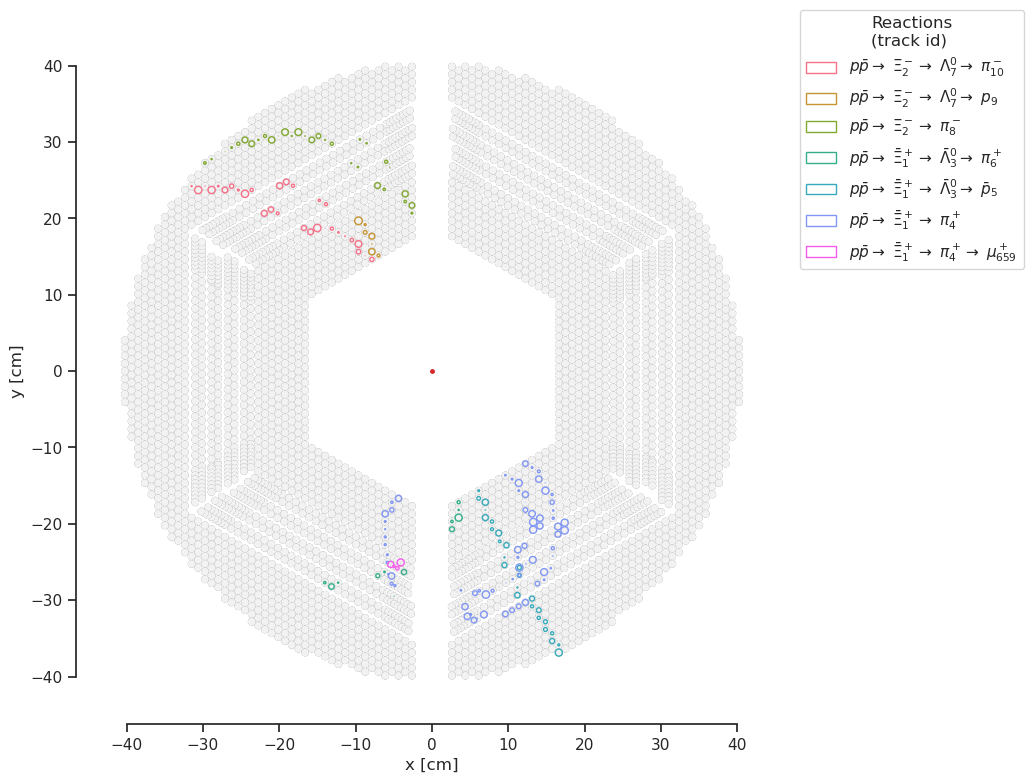

In [12]:
plt.close('all')

# Set the general style of the plot using seaborn
sns.set_theme()
sns.set_style("ticks")
sns.set_context("notebook")

numTracks = len(isochronePerTrack)
colors = sns.color_palette("husl", numTracks)

fig, ax = plt.subplots(figsize=(8,8))

# Plot the IP
ax.plot(0,0,marker='.',ms=5, color='tab:red')

# Plot the STT in the background
for index, row in data.iterrows():
        sttOuterTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], fc='gray', ec="None")
        ax.add_patch(sttOuterTube)
        sttInnerTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['innerRadius[cm]'], fc='white', ec="None", alpha=0.9)
        ax.add_patch(sttInnerTube)

trackNum = 0

for trackID in isochronePerTrack:
	trackLabel = getProcess(int(trackID), mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId)
	numPoint = 0
	for i in range(len(isochronePerTrack[trackID])):
		if numPoint == 0:
			isochrone = patches.Circle((xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]), isochronePerTrack[trackID][i], ec=colors[trackNum], lw=1, fc='None', label=trackLabel)
		else:
			isochrone = patches.Circle((xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]), isochronePerTrack[trackID][i], ec=colors[trackNum], lw=1, fc='None')
		ax.add_patch(isochrone)
		numPoint += 1
	trackNum += 1

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect('equal')

sns.despine(fig=fig, ax=ax, offset=10, trim=True)
fig.tight_layout()	
fig.legend(title="Reactions\n(track id)", loc="upper left", bbox_to_anchor=(1, 1))

imgPath = imagePath + projectName + "_xyIsochrones_" + str(eventNumber)

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/digiXiAntiXi_xyProjection_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/pandaml/digiXiAntiXi_xyProjection_0.pdf


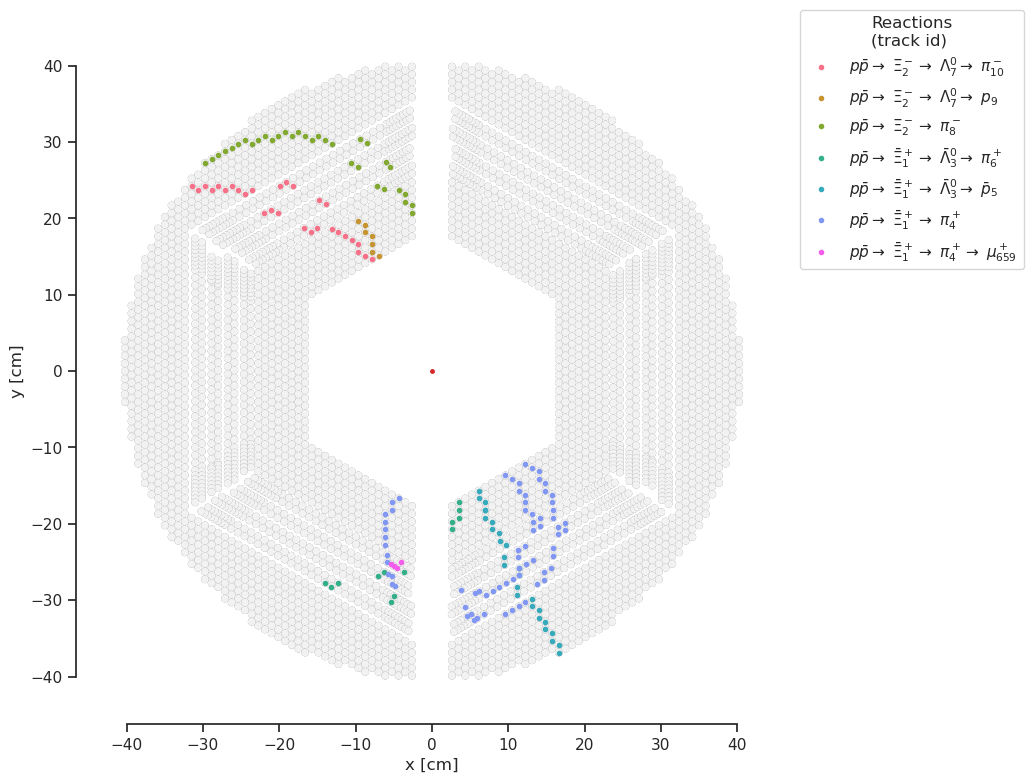

In [13]:
plt.close('all')

# Set the general style of the plot using seaborn
sns.set_theme()
sns.set_style("ticks")
sns.set_context("notebook")


numTracks = len(isochronePerTrack)
colors = sns.color_palette("husl", numTracks)

fig, ax = plt.subplots(figsize=(8,8))

# Plot the IP
ax.plot(0,0,marker='.',ms=5, color='tab:red')

# Plot the STT in the background
for index, row in data.iterrows():
        sttOuterTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], fc='gray', ec="None")
        ax.add_patch(sttOuterTube)
        sttInnerTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['innerRadius[cm]'], fc='white', ec="None", alpha=0.9)
        ax.add_patch(sttInnerTube)

trackNum = 0

for trackID in isochronePerTrack:
	trackLabel = getProcess(int(trackID), mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId)
	ax.plot(xPosPerTrack[trackID], yPosPerTrack[trackID], color=colors[trackNum], ls="None", marker = "o", ms=3, label=trackLabel)
	trackNum += 1

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect('equal')

sns.despine(fig=fig, ax=ax, offset=10, trim=True)
fig.tight_layout()	
fig.legend(title="Reactions\n(track id)", loc="upper left", bbox_to_anchor=(1, 1))

imgPath = imagePath + projectName + "_xyProjection_" + str(eventNumber)

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')